In [2]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cracked_files = [f'with_crack_{i*18}_deg.s2p' for i in range(21)]
non_cracked_files = [f'without_crack_{i*18}_deg.s2p' for i in range(21)]

In [4]:
cracked_networks = [rf.Network(f) for f in cracked_files]
non_cracked_networks = [rf.Network(f) for f in non_cracked_files]

In [5]:
angles = range(0, 378, 18)

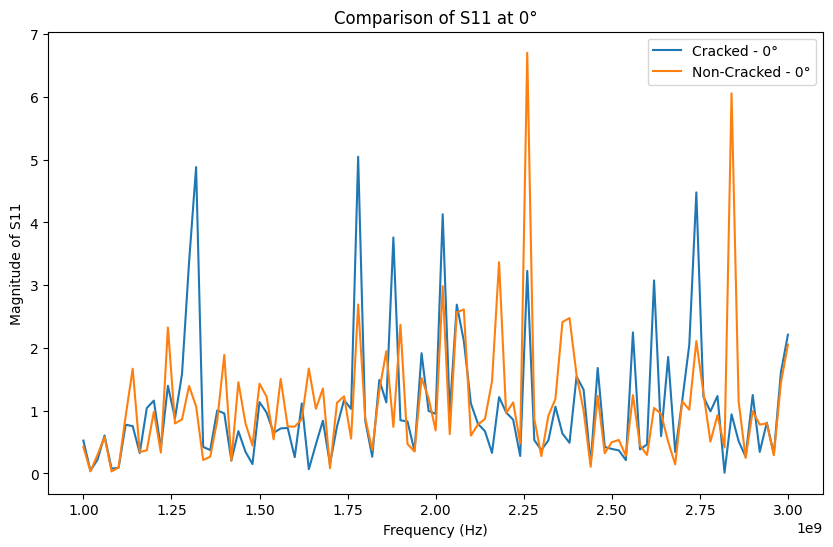

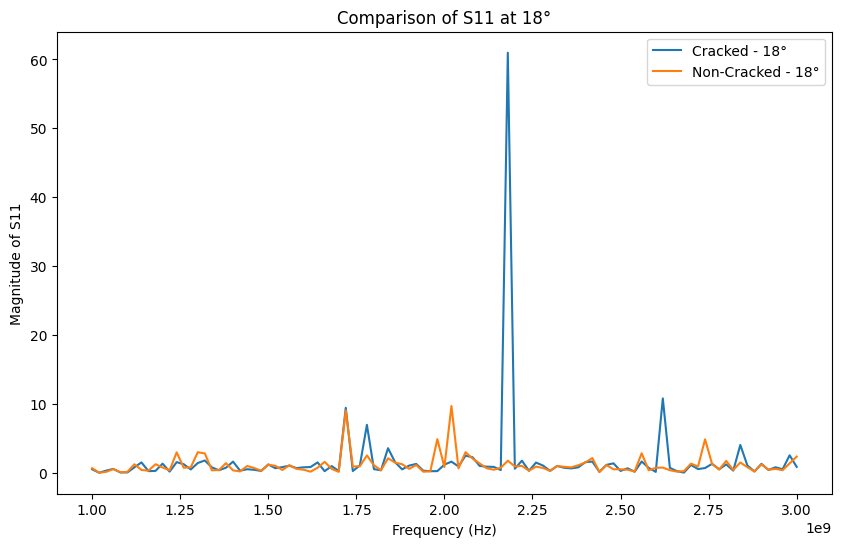

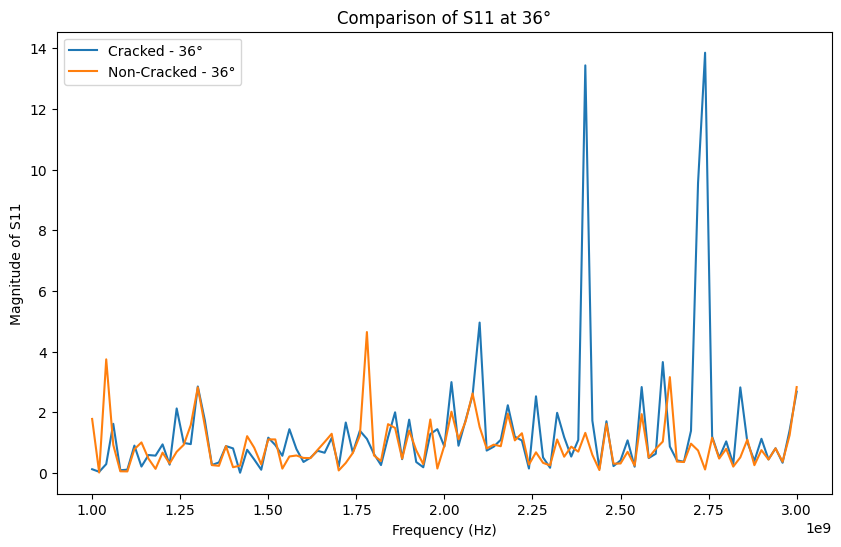

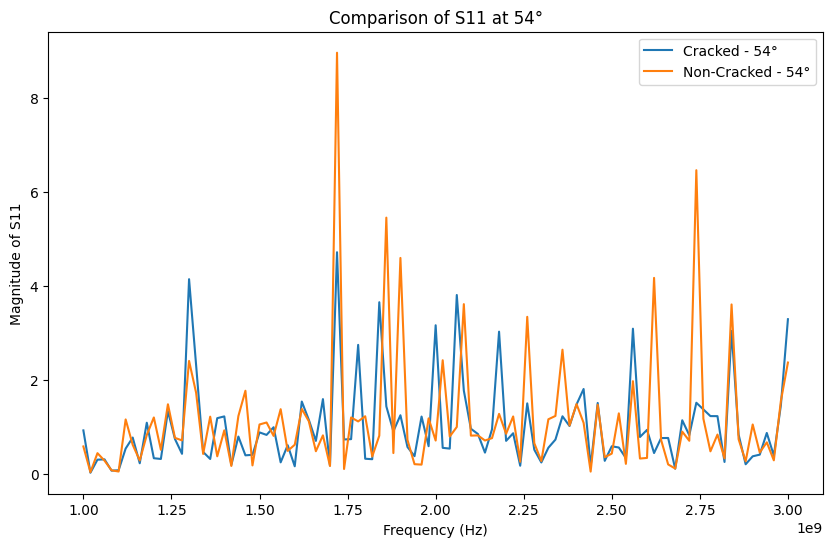

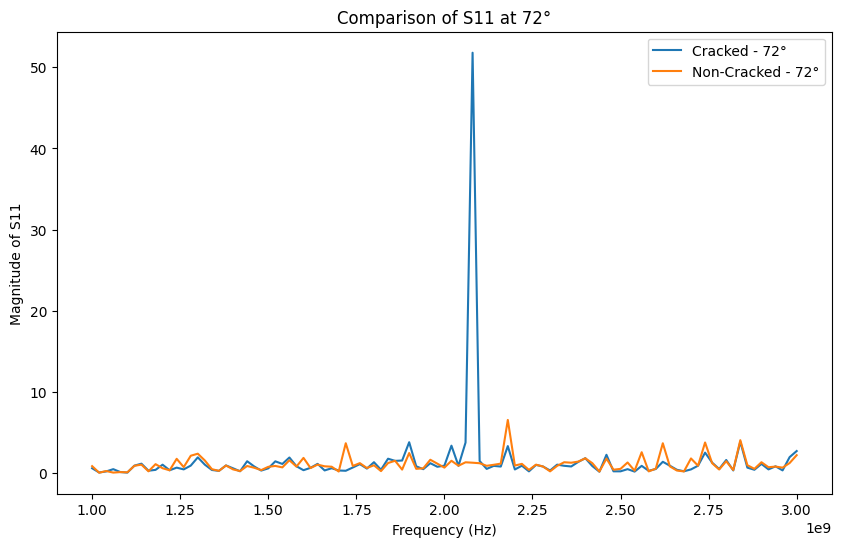

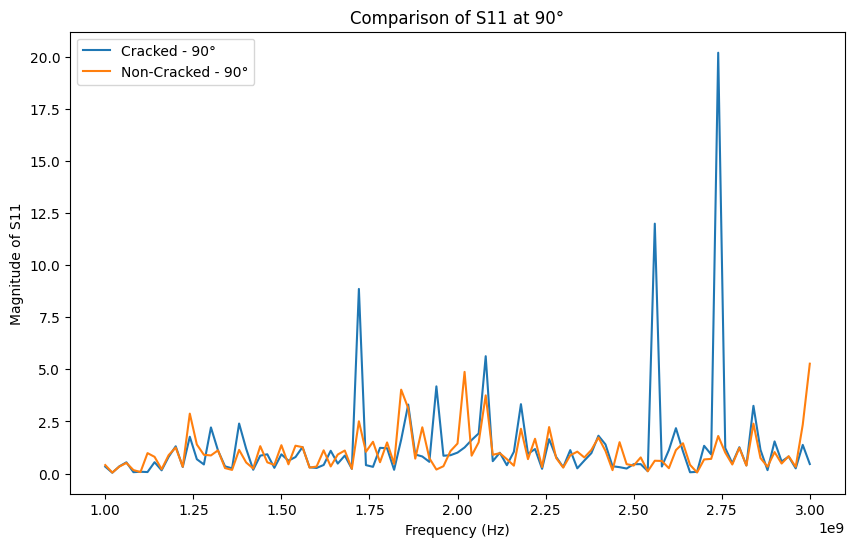

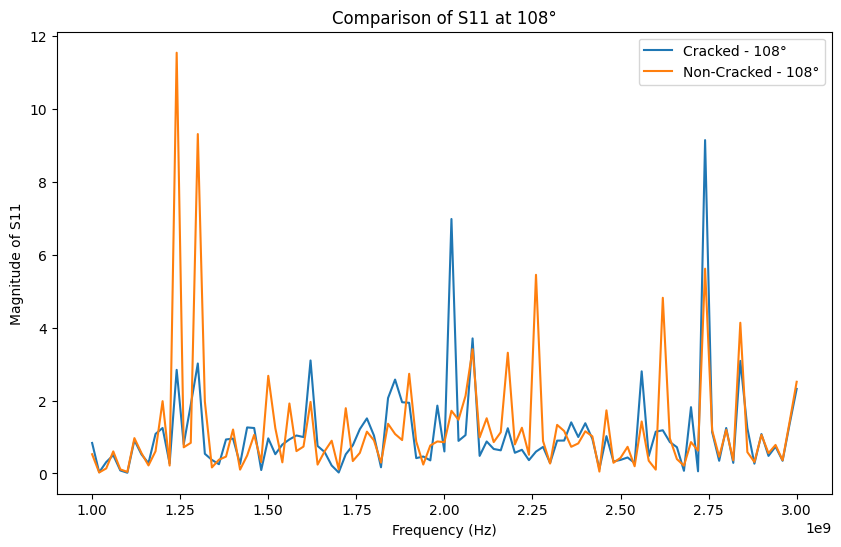

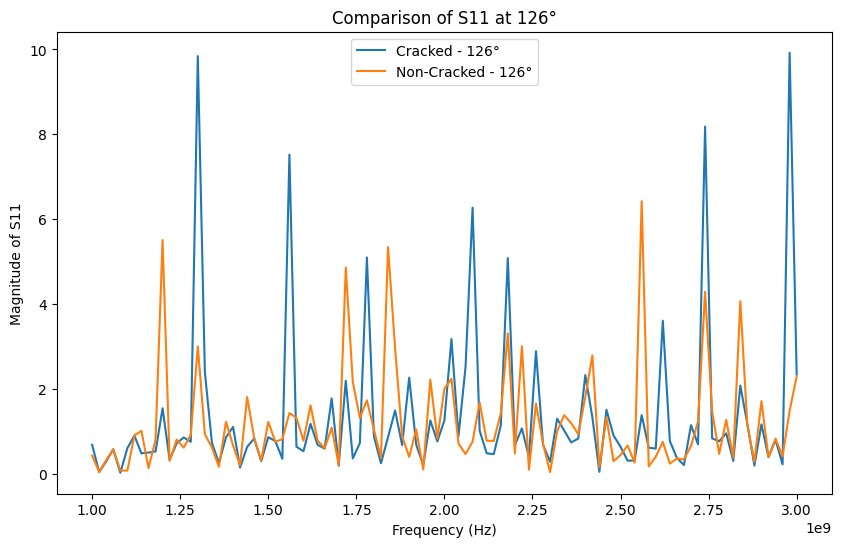

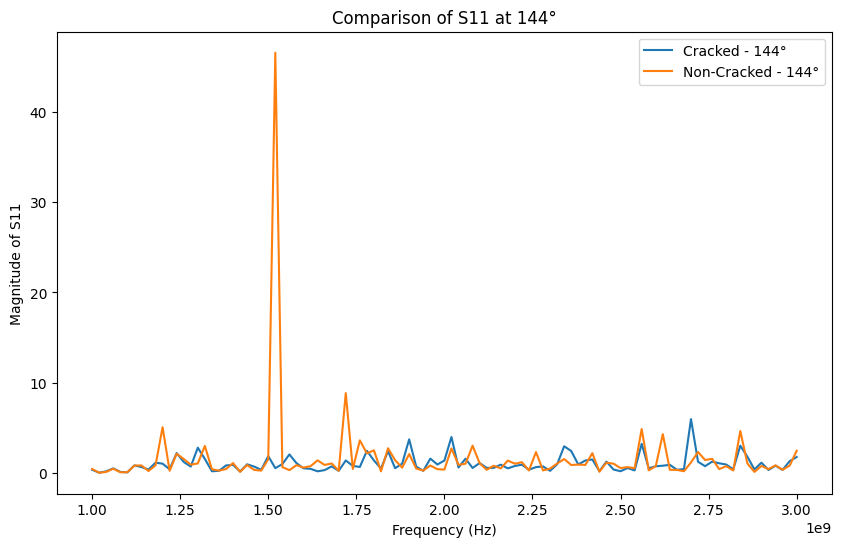

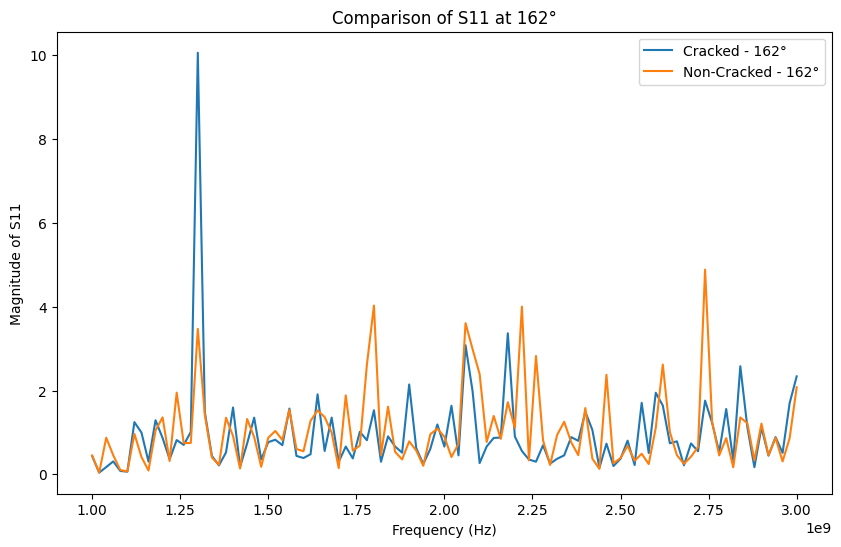

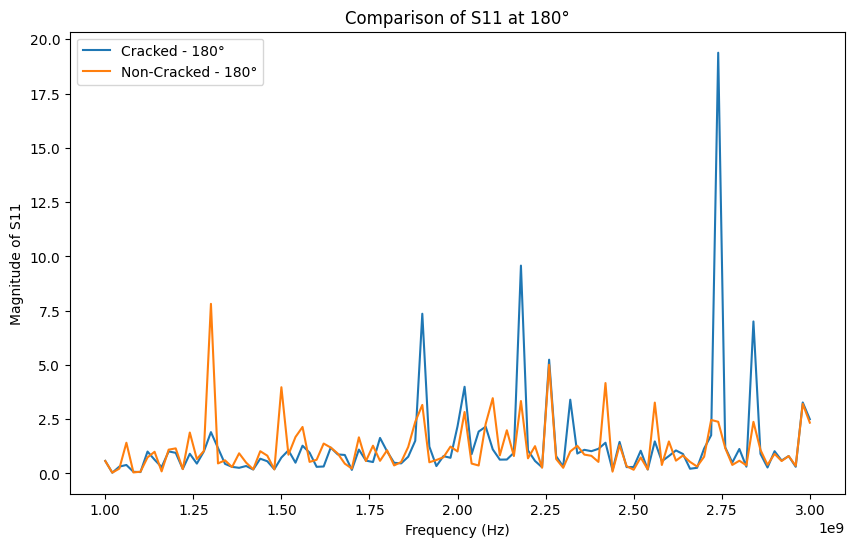

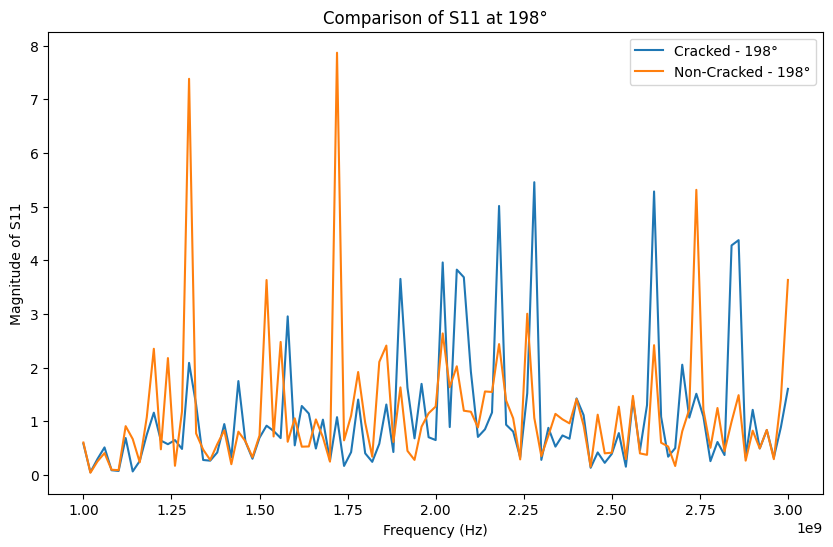

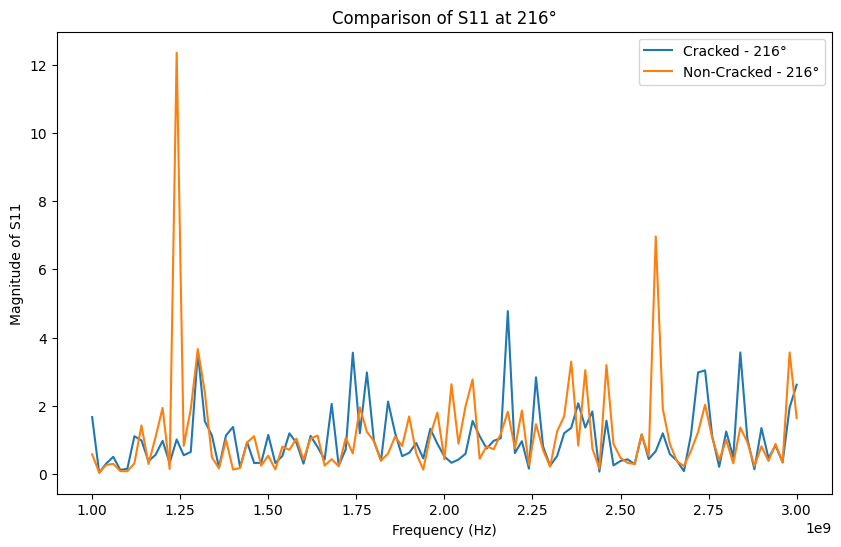

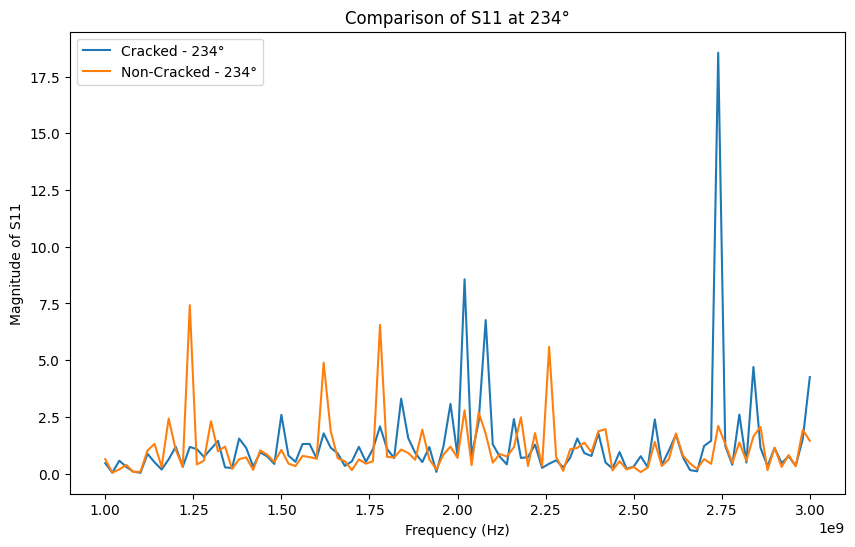

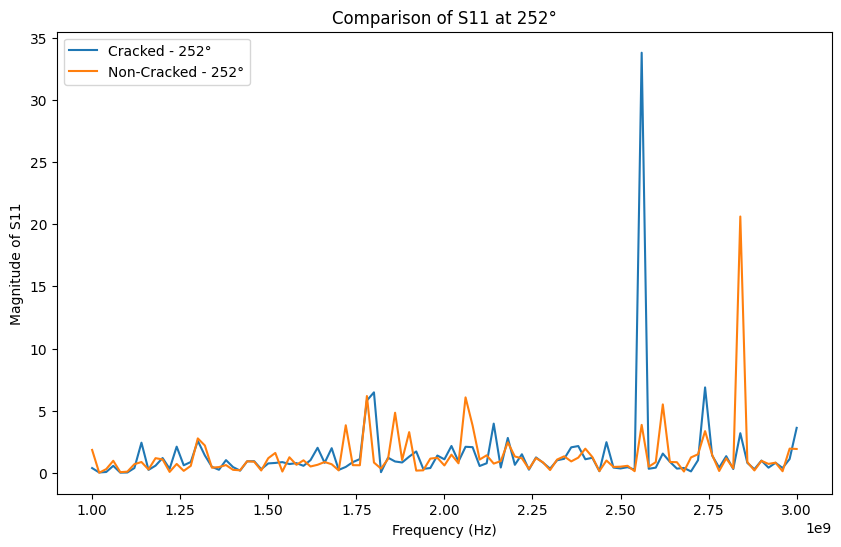

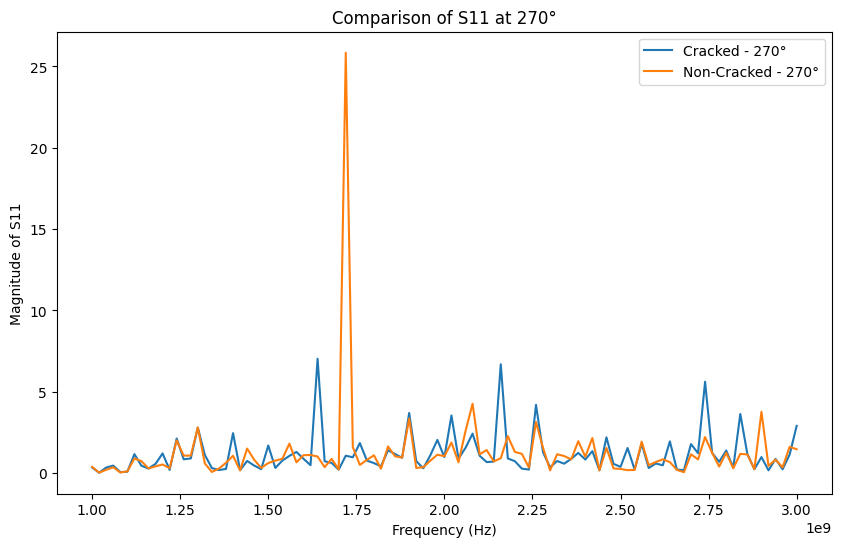

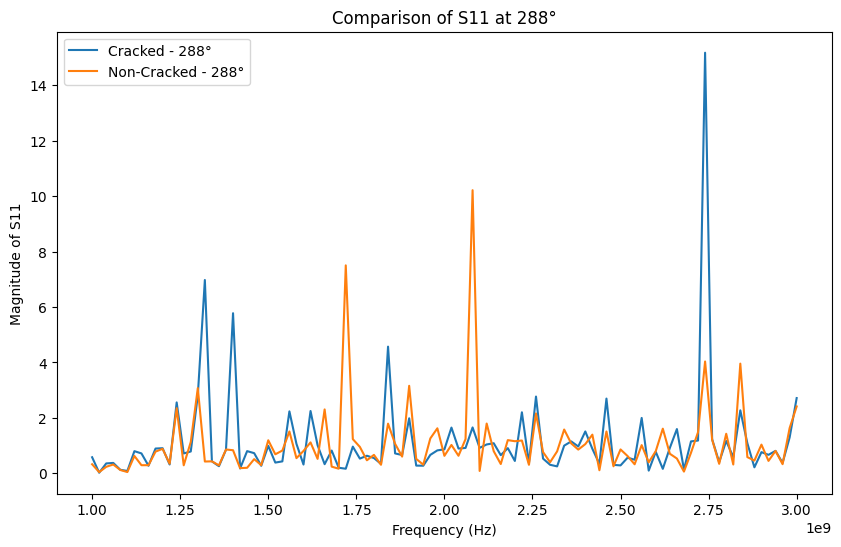

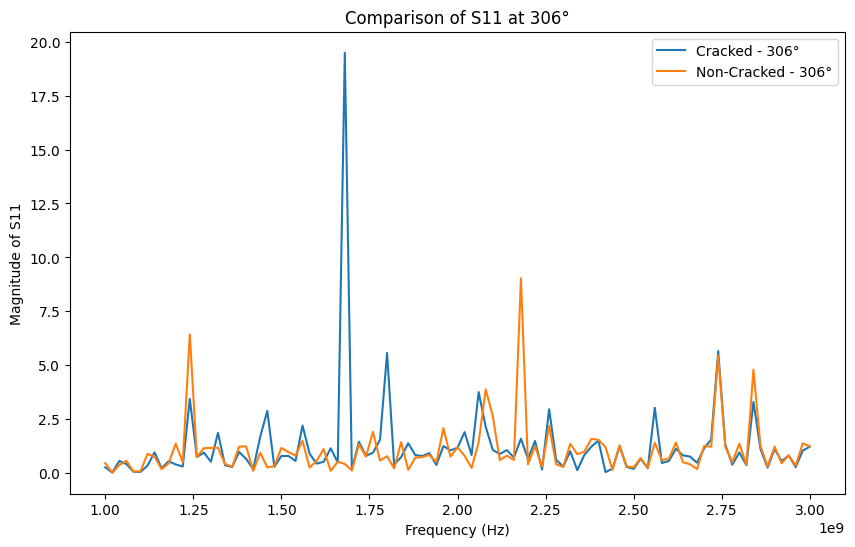

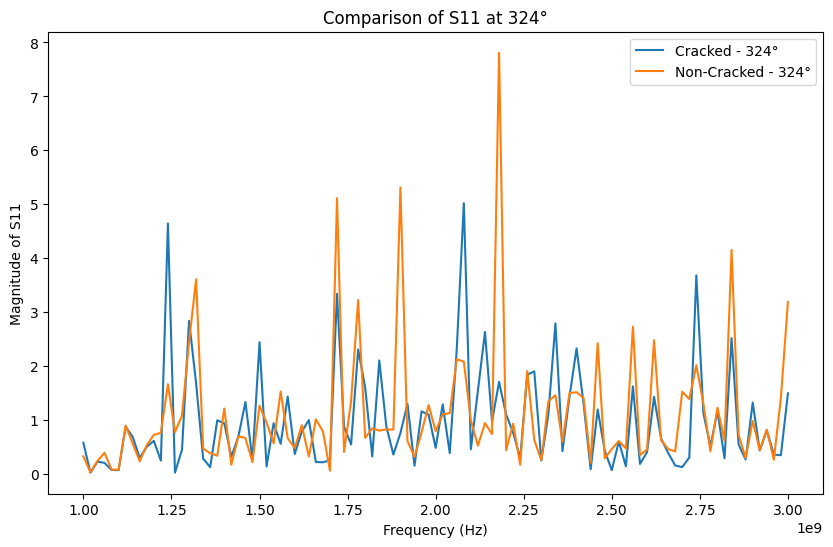

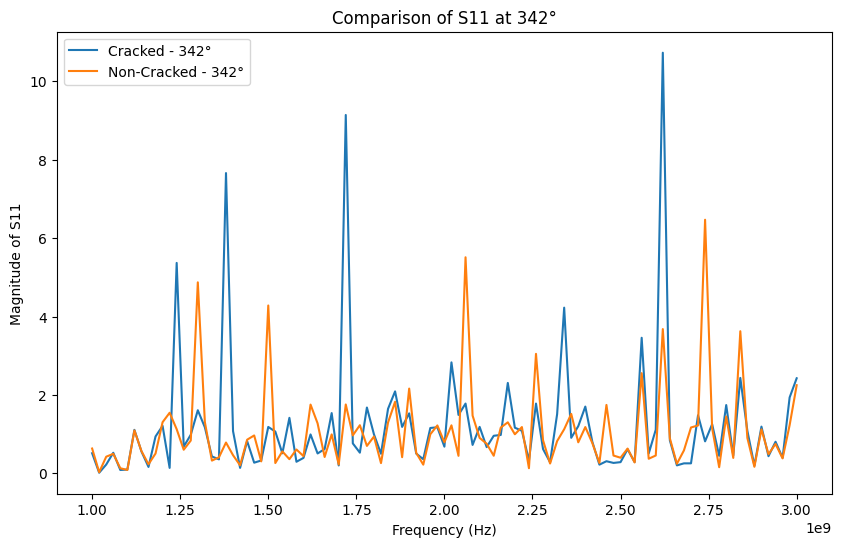

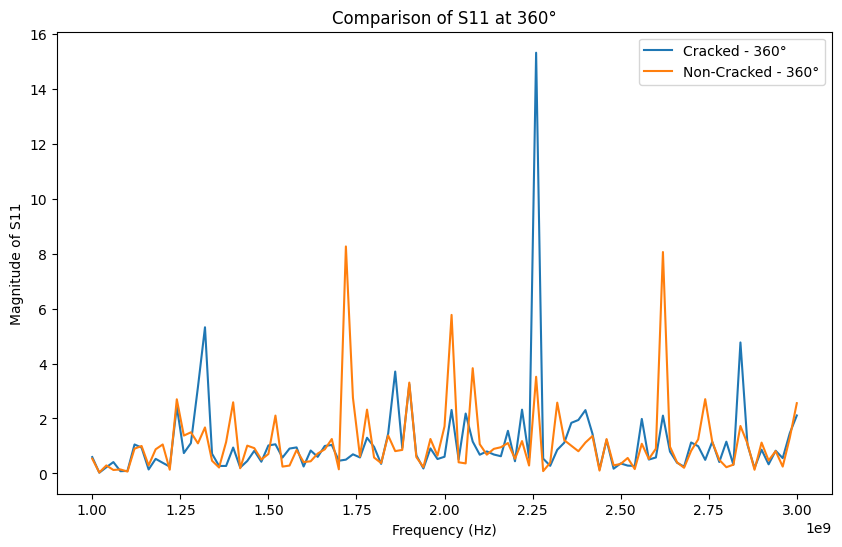

In [6]:
for angle, cracked_net, non_cracked_net in zip(angles, cracked_networks, non_cracked_networks):
    plt.figure(figsize=(10, 6))

    # cracked
    plt.plot(cracked_net.f, np.abs(cracked_net.s[:, 0, 0]), label=f'Cracked - {angle}°')

    # non cracked
    plt.plot(non_cracked_net.f, np.abs(non_cracked_net.s[:, 0, 0]), label=f'Non-Cracked - {angle}°')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude of S11')
    plt.title(f'Comparison of S11 at {angle}°')
    plt.legend()
    plt.show()

In [7]:
cracked_networks[0].s

array([[[ 1.21508173e-01+5.08463069e-01j,
          7.00866342e-01+1.36996448e-01j],
        [-2.16991320e+00-1.65822877e-01j,
          1.58990272e-01+6.13885684e-01j]],

       [[-1.25652473e-02+4.12277159e-02j,
         -5.57918317e-01-2.31886162e-02j],
        [-6.02335201e-01+1.15664433e-01j,
         -5.70645265e-02+1.01108110e-01j]],

       [[-5.96783442e-02+2.09225238e-01j,
         -5.95223141e-01-1.17885274e+00j],
        [-5.44771227e-01-7.38100283e-01j,
         -5.22462000e-02+1.21372625e-01j]],

       [[-5.92334908e-01-1.16640993e-01j,
          1.90536166e-01+1.31249192e+00j],
        [ 1.93921937e-02-2.26747708e+00j,
         -3.47154023e-01-4.67102563e-01j]],

       [[-6.83725625e-02+3.19989498e-02j,
          5.61920740e-01-1.60459375e+00j],
        [ 8.25325955e-02+6.32871159e-01j,
         -1.78607429e-02+6.63790740e-02j]],

       [[-7.71425979e-02+4.62603728e-02j,
          9.58117901e-03+1.78062414e-01j],
        [-1.18405736e+00+1.92767191e+00j,
          1.2

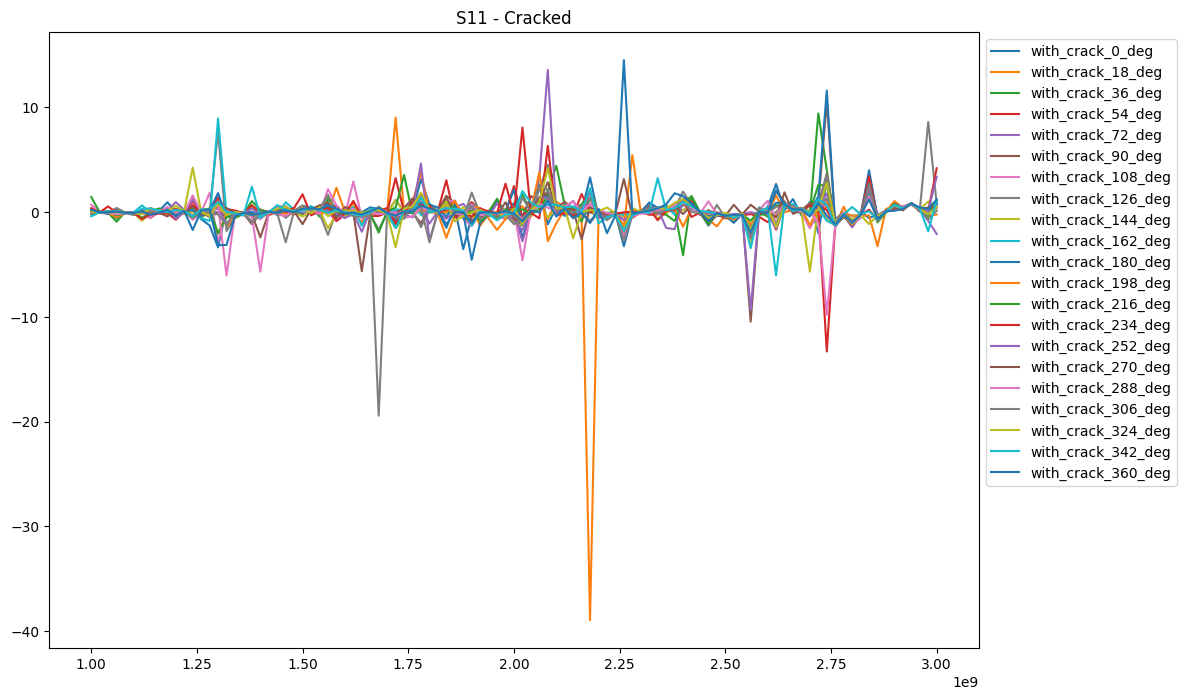

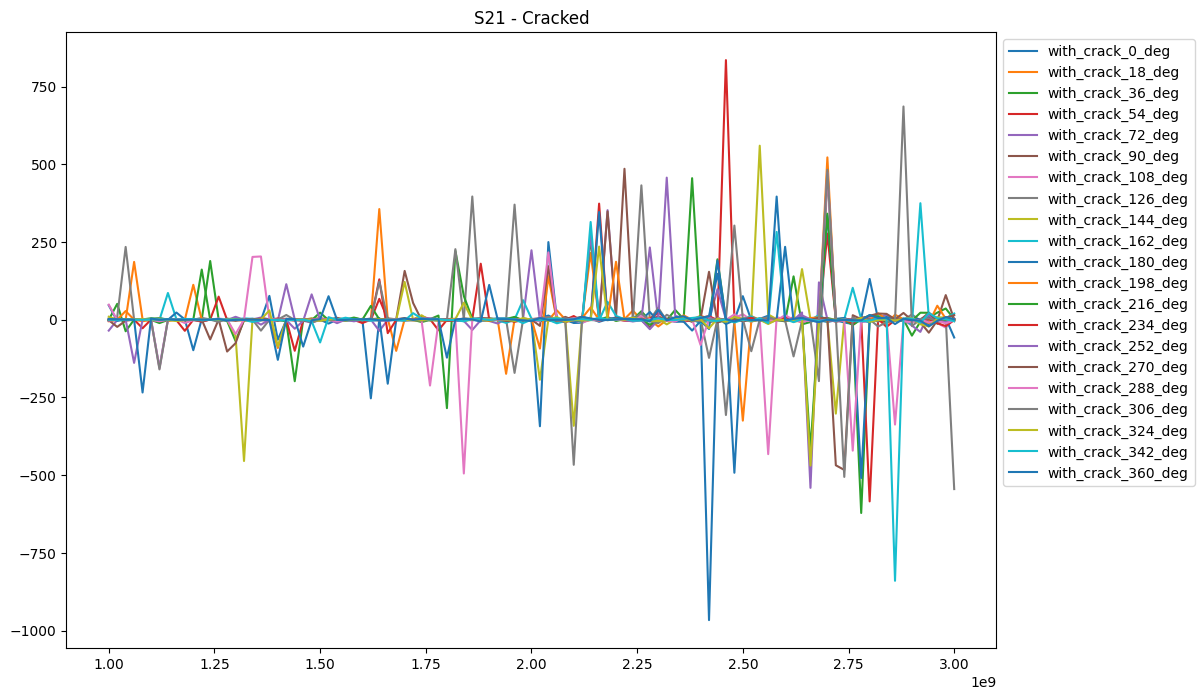

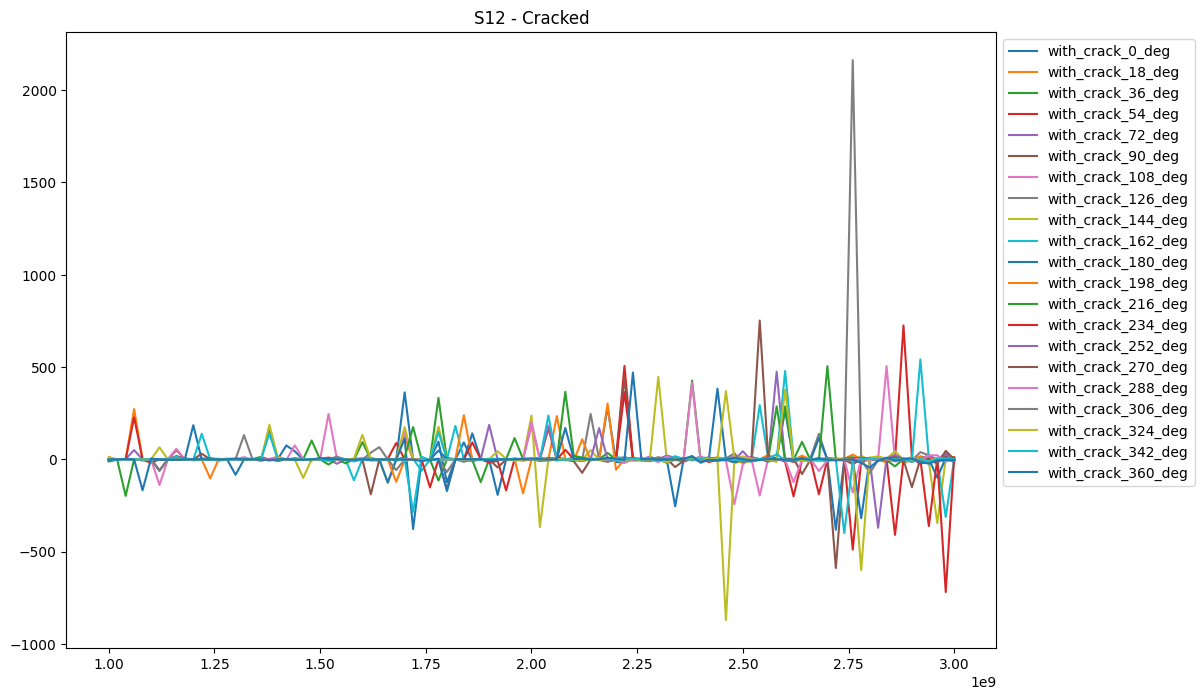

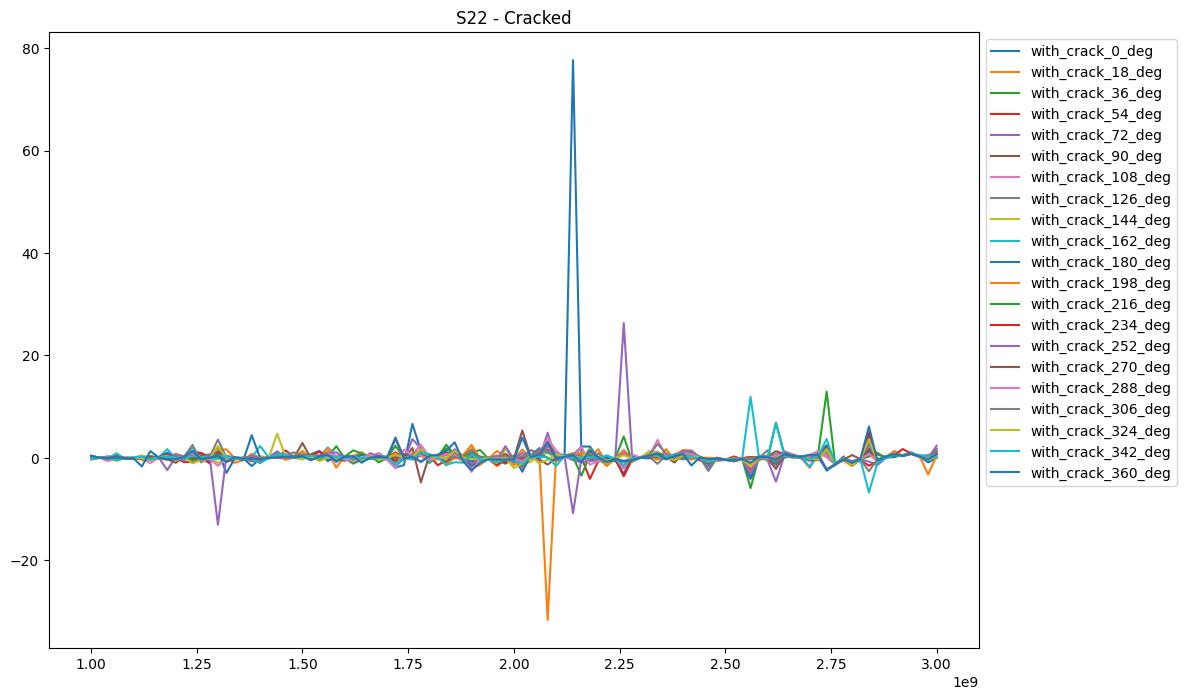

In [8]:
# Visualize the S-parameters for cracked bones
fig, ax = plt.subplots(figsize=(12, 8))
for network in cracked_networks:
    ax.plot(network.f, network.s[:, 0, 0].real, label=network.name)
ax.set_title('S11 - Cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for network in cracked_networks:
    ax.plot(network.f, network.s[:, 1, 0].real, label=network.name)
ax.set_title('S21 - Cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for network in cracked_networks:
    ax.plot(network.f, network.s[:, 0, 1].real, label=network.name)
ax.set_title('S12 - Cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for network in cracked_networks:
    ax.plot(network.f, network.s[:, 1, 1].real, label=network.name)
ax.set_title('S22 - Cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

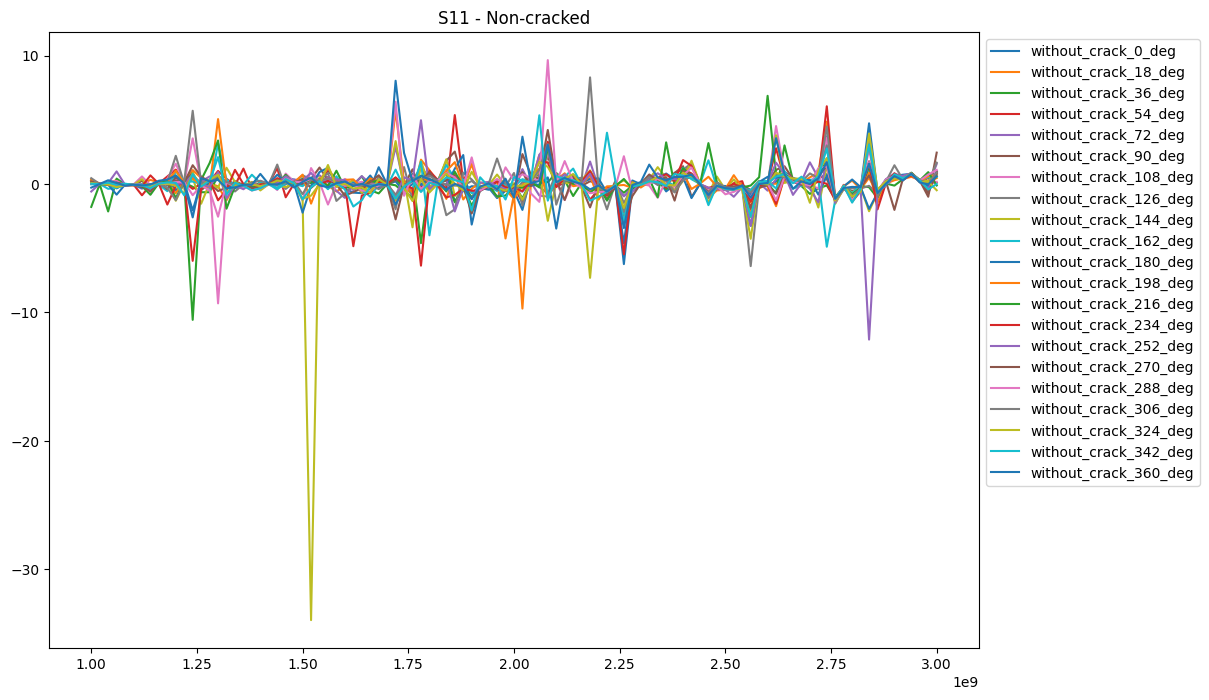

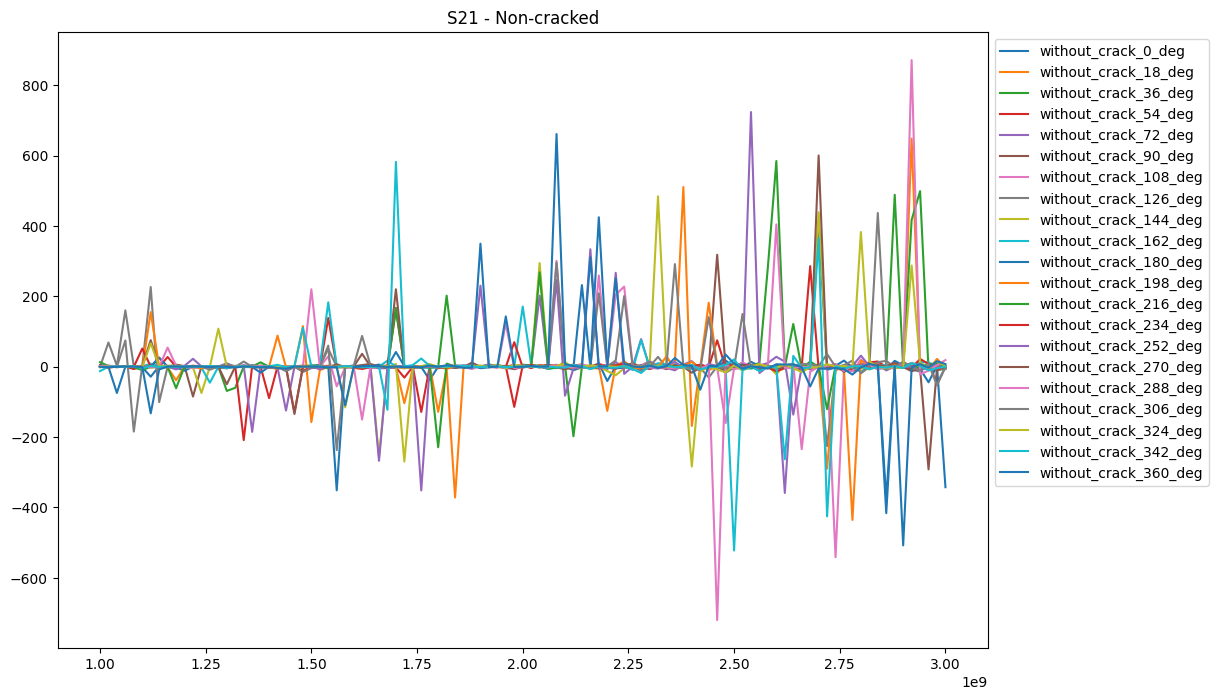

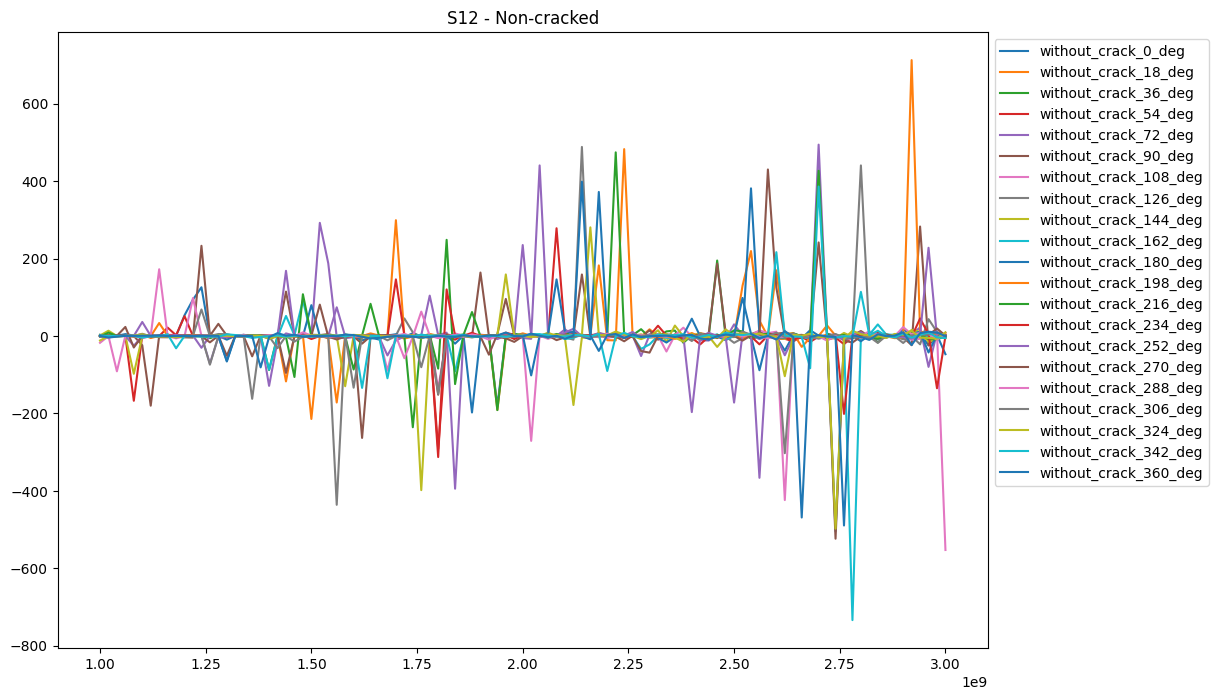

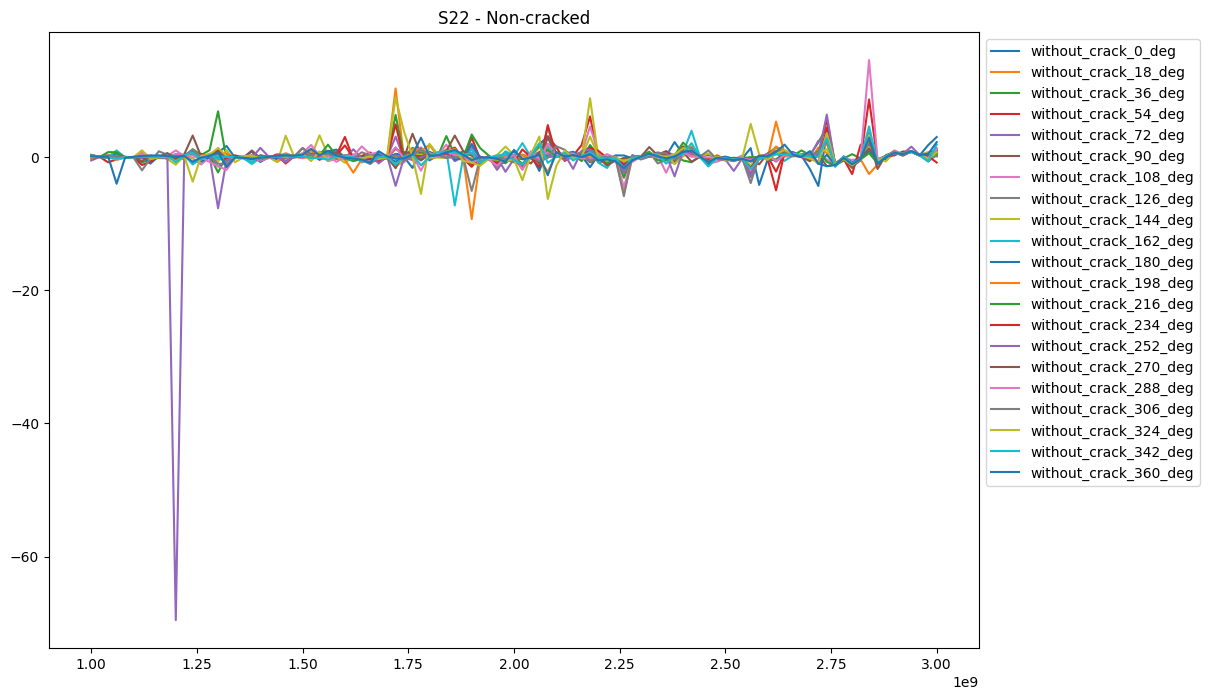

In [9]:
# Visualize the S-parameters for non-cracked bones
fig, ax = plt.subplots(figsize=(12, 8))
for network in non_cracked_networks:
    ax.plot(network.f, network.s[:, 0, 0].real, label=network.name)
ax.set_title('S11 - Non-cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for network in non_cracked_networks:
    ax.plot(network.f, network.s[:, 1, 0].real, label=network.name)
ax.set_title('S21 - Non-cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for network in non_cracked_networks:
    ax.plot(network.f, network.s[:, 0, 1].real, label=network.name)
ax.set_title('S12 - Non-cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for network in non_cracked_networks:
    ax.plot(network.f, network.s[:, 1, 1].real, label=network.name)
ax.set_title('S22 - Non-cracked')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

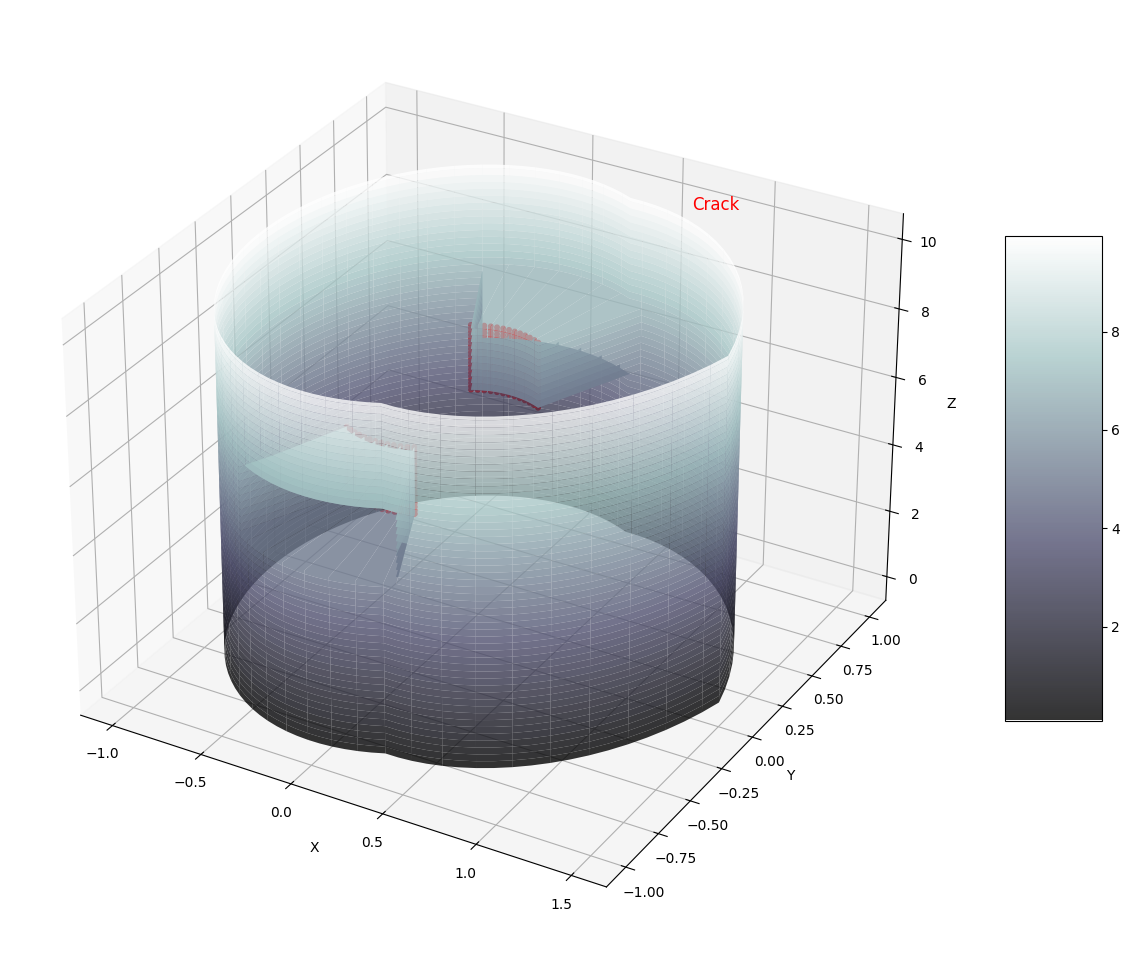

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bone-like shape
def create_bone(length, radius_shaft, radius_ends, resolution=100):
    theta = np.linspace(0, 2*np.pi, resolution)
    z = np.linspace(0, length, resolution)
    theta, z = np.meshgrid(theta, z)

    # Create a varying radius to simulate bone shape
    radius = np.ones_like(z) * radius_shaft
    transition_points = int(resolution*0.2)
    radius[:, :transition_points] = np.linspace(radius_ends, radius_shaft, transition_points)
    radius[:, -transition_points:] = np.linspace(radius_shaft, radius_ends, transition_points)

    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y, z

# Create a visible crack
def create_crack(x, y, z, crack_depth, crack_width, crack_height, crack_start):
    mask = ((x > -crack_width/2) & (x < crack_width/2) &
            (z > crack_start) & (z < crack_start + crack_height))
    x[mask] = x[mask] * (1 - crack_depth)
    y[mask] = y[mask] * (1 - crack_depth)
    return x, y, z

# Set up the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create bone
length, radius_shaft, radius_ends = 10, 1, 1.5
x, y, z = create_bone(length, radius_shaft, radius_ends)

# Add crack
crack_depth, crack_width, crack_height, crack_start = 0.5, 0.8, 2, 5
x, y, z = create_crack(x, y, z, crack_depth, crack_width, crack_height, crack_start)

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='bone', alpha=0.8)

# Highlight the crack
crack_mask = ((x > -crack_width/2) & (x < crack_width/2) &
              (z > crack_start) & (z < crack_start + crack_height))
ax.scatter(x[crack_mask], y[crack_mask], z[crack_mask], c='red', s=10, alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Add text annotation for the crack
ax.text(0, 2, crack_start + crack_height/2, 'Crack', fontsize=12, color='red')

plt.tight_layout()

plt.show()